# Intro to Python: Exercise 2

## Pairwise Distances in the Plane

One application of machine learning to computer vision is interest point tracking. The location of corners in an image is tracked along subsequent frames of a video signal (see Figure 1 for a synthetic example). In this context, one is often interested in the pairwise distance of all points in the first frame to all points in the second frame. Matching points according to minimal distance is a simple heuristic that works well if many interest points are found in both frames and perturbations are small.
Write a function that accepts two matrices P ∈ R<sup>p×2</sup>,Q ∈ R<sup>q×2</sup> as input, where each row contains the (x,y) coordinates of an interest point. Note that the number of points (p and q) do not have to be equal. As output, compute the pairwise distances of all points in P to all points in Q and collect them in matrix D. Element D<sub>i,j</sub> is the Euclidean distance of the i-th point in P to the j-th point in Q.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))               # p:4*2        q:5*2
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))  # p_big:100*80 q_big:120*80
# p是所有感兴趣的像素，q是所有感兴趣的像素, 
print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [18]:
def naive(p, q):
    ''' fill your code in here...
    '''
    output = np.empty((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            output[i][j] = np.sqrt(((p[i] - q[j])**2).sum())
    return output

In [ ]:
def naive2(p, q):
    result = np.zeros((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            tmp = 0
            for k in range(p.shape[1]):
                tmp += (p[i,k]-q[j,k])**2
            result[i,j] = tmp
    return np.sqrt(result)

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [ ]:
import numpy as np
x = np.arange(20).reshape((5,4))
dense_grid = np.indices((2,3))                  #返回一个2x3网格序列,密集分布，每个行号和列号一一对应，表示一个位置的元素。
sparse_grid  = np.indices((2,3),sparse= True)   #返回一个松散排布的2x3网格的行分布和列分布元组,行号和列号不是一一对应，一个行号对应多个列号。
print("x:\n",x)
print("x.shape:",x.shape)
print("================================")
print("dense_grid:\n",dense_grid)
print("================================")
print("行序号:\n",dense_grid[0])
print()
print("列序号:\n ",dense_grid[1])
print("\n")
print("切片效果:\n", x[dense_grid[0],dense_grid[1]])           #等效于x[:2,:3]切片效果 
print("================================")
print("sparse_grid:\n",sparse_grid)
print("================================")
print("切片效果: \n",x[sparse_grid])                           #等效于x[:2,:3]切片效果

In [4]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [26]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    distance = np.sqrt(np.square((p[rows.ravel()] - q[cols.ravel()])).sum(axis=1))
    return distance.reshape(((p.shape[0], q.shape[0])))

In [ ]:
def with_indices_2(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    distances = np.sqrt(np.sum((p[rows, :] - q[cols, :])**2, axis=2))
    return distances

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [6]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [23]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))
# (4,1,2) - (1,5,2)

array([[0.        , 1.41421356, 1.        ],
       [1.41421356, 0.        , 1.        ]])

In [29]:
p = np.eye(2,2)
q = np.eye(3,2)
print(p, '\n', q)
scipy_version(p,q) == naive(p,q) 
naive(p,q) == with_indices(p,q) 
with_indices(p,q) == tensor_broadcasting(p, q)

[[1. 0.]
 [0. 1.]] 
 [[1. 0.]
 [0. 1.]
 [0. 0.]]


(array([[ True,  True,  True],
        [ True,  True,  True]]),
 array([[ True,  True,  True],
        [ True,  True,  True]]),
 array([[ True,  True,  True],
        [ True,  True,  True]]))

# Compare methods

In [24]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

66.7 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.47 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
371 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.7 ms ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


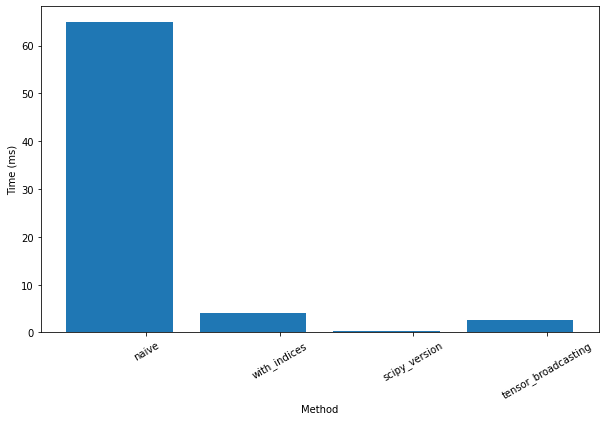

In [25]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()